### 위스콘신 유방암

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [4]:
cancer.data.dtype

dtype('float64')

### 타이타닉

In [18]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


###### 성별과 pclass만으로 로지스틱 회귀 적용

In [19]:
X = titanic[['pclass','sex']] #.loc 속성 안쓰고 사용.
# .loc 쓰고 싶으면 앞에 행 꼭 붙여야 함.
# X = titanic.loc[:,['pclass','sex']]
Y = titanic['survived']


In [33]:
import pandas as pd
X2 = pd.get_dummies(X,columns=['pclass','sex']) # One-Hot Encoding 적용.

from sklearn.model_selection import train_test_split
x_tr, x_te,y_tr,y_te = train_test_split(
    X2,Y,random_state=0,stratify=Y
)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_tr,y_tr)
print(model.score(x_tr,y_tr), model.score(x_te,y_te))
display(x_te.iloc[[0,1],:]) # index가 아니고 순서상 0번행의 모든 열을 출력하세요. 라는 의미.
print(y_te[:2])
# display(x_te)
model.predict([
        [0,1,0,0,1],
        [0,0,1,0,1]
    ]
) # predict의 x값은 반드시 2차원으로 넣어야 함.

0.7919161676646707 0.7713004484304933


,pclass_1,pclass_2,pclass_3,sex_female,sex_male
288,0,1,0,0,1
869,0,0,1,0,1


288    1
869    1
Name: survived, dtype: int64


array([0, 0], dtype=int64)

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_tr, x_te, y_tr, y_te = train_test_split(
    cancer['data'],
    cancer['target'],
    stratify=cancer['target'],
    random_state=0
)
x_tr.shape, x_te.shape

((426, 30), (143, 30))

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te) # 훈련데이터에 과적합되어있는 상태
# 과적합 상태.

(1.0, 0.9230769230769231)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te) # 훈련데이터에 과적합되어있는 상태
# 과적합 상태.

(0.9765258215962441, 0.9300699300699301)

In [41]:
model.feature_importances_

array([0.        , 0.02831198, 0.        , 0.        , 0.        ,
       0.00668975, 0.        , 0.        , 0.01101841, 0.00752597,
       0.00744818, 0.        , 0.00980366, 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02958161, 0.72534081, 0.03687207, 0.00931787,
       0.        , 0.00401385, 0.10516335, 0.        , 0.00891967])

<AxesSubplot:>

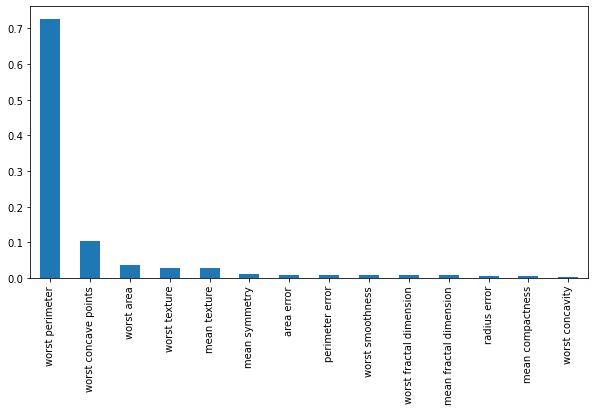

In [42]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.9671361502347418, 0.9370629370629371)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.9460093896713615, 0.916083916083916)

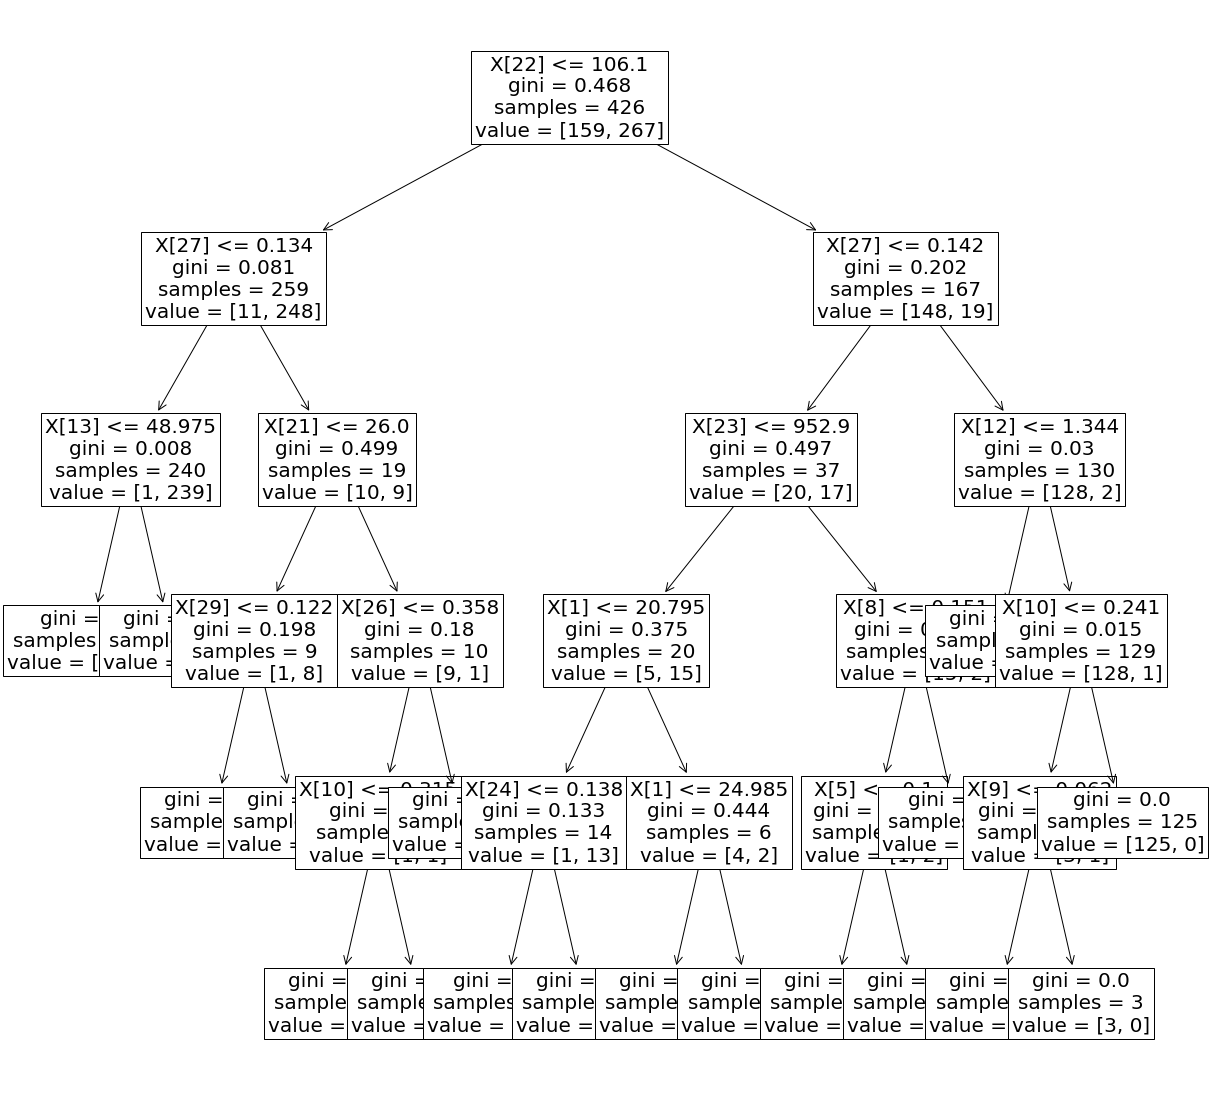

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model,fontsize=20)
plt.show()

In [46]:
!pip install pydot graphviz

In [47]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
               feature_names=cancer['feature_names'],
               class_names=cancer['target_names'],
               impurity=True,
               filled=True)

In [48]:
import graphviz
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### 보스턴 주택가격 예측 ( Decision Tree)

In [61]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

x_tr, x_te, y_tr, y_te = train_test_split(
    boston['data'],
    boston['target'],
    random_state=0
)

In [62]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(1.0, 0.6534996167860475)

In [63]:
model.feature_importances_

array([5.21322613e-02, 3.43021052e-04, 1.43775533e-02, 3.19087087e-04,
       1.40244346e-02, 2.42846762e-01, 4.88872355e-03, 3.29360173e-02,
       3.80380454e-04, 1.10036632e-02, 3.06482388e-02, 7.03646209e-03,
       5.89063396e-01])

<AxesSubplot:>

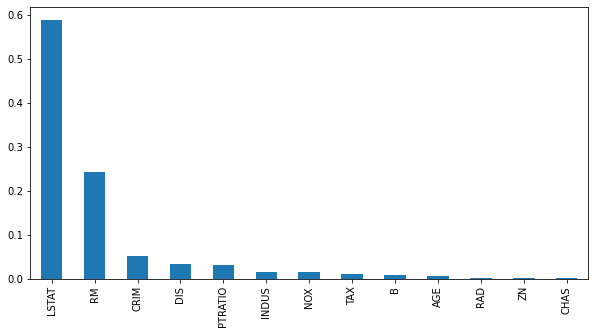

In [65]:
import pandas as pd
fi = pd.Series(model.feature_importances_,
              index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [66]:
fi[fi!=0].sort_values(ascending=False)

LSTAT      0.589063
RM         0.242847
CRIM       0.052132
DIS        0.032936
PTRATIO    0.030648
INDUS      0.014378
NOX        0.014024
TAX        0.011004
B          0.007036
AGE        0.004889
RAD        0.000380
ZN         0.000343
CHAS       0.000319
dtype: float64

#### Ensemble - voting 실습. 위스콘신 유방암 진단

In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_tr, x_te, y_tr, y_te = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=0
)
x_tr.shape, x_te.shape

((426, 30), (143, 30))

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

In [87]:
from sklearn.ensemble import VotingClassifier
hard = VotingClassifier([('knn1',knn1),('knn2',knn2),
                        ('lr',lr),
                        ('dt3',dt3),
                        ('dt5',dt5)])

soft = VotingClassifier([('knn1',knn1), ('knn2',knn2),
                        ('lr',lr),('dt3',dt3),
                        ('dt5',dt5)], voting='soft')

In [88]:
names = ['hard','soft','knn1','knn2','lr','dt3','dt5']
for idx, model in enumerate([hard,soft,knn1, knn2,lr,dt3,dt5]) :
    model.fit(x_tr,y_tr)
    name=names[idx]
    train_score = model.score(x_tr,y_tr)*100
    test_score = model.score(x_te,y_te)*100
    print(f"{name} Train Accuracy:{train_score:.2f}%")
    print(f"{name} Test Accuracy:{test_score:.2f}%")
    print()


hard Train Accuracy:98.12%
hard Test Accuracy:95.10%

soft Train Accuracy:99.53%
soft Test Accuracy:95.80%

knn1 Train Accuracy:94.60%
knn1 Test Accuracy:91.61%

knn2 Train Accuracy:95.77%
knn2 Test Accuracy:91.61%

lr Train Accuracy:96.71%
lr Test Accuracy:93.71%

dt3 Train Accuracy:97.65%
dt3 Test Accuracy:91.61%

dt5 Train Accuracy:100.00%
dt5 Test Accuracy:91.61%



- breast cancer 데이터 로딩 함수

In [97]:
# breast cancer 데이터 로딩 함수
def my_load_dataset(data_name, stratify=False) :
    pass
    if data_name == 'breast_cancer' :
        from sklearn.datasets import load_breast_cancer
        dataset = load_breast_cancer()
    elif data_name == 'iris' :
        from sklearn.datasets import load_iris
        dataset = load_iris()
    if stratify==False:
        stratify=None
    else :
        stratify=dataset.target
    from sklearn.model_selection import train_test_split
    x_tr, x_te, y_tr, y_te = train_test_split(
        dataset.data,
        dataset.target,
        random_state=0,
        stratify = stratify
    )
    return (x_tr,x_te,y_tr,y_te)

x_tr,x_te,y_tr,y_te = my_load_dataset('breast_cancer',stratify=True)

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(max_depth=3).fit(x_tr,y_tr)
# model.score(x_tr,y_tr), model.score(x_te,y_te)

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(1.0, 0.9473684210526315)

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(1.0, 0.9736842105263158)

#### Ensemble - Stacking 실습

In [98]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf',RandomForestClassifier()),
             ('gb',GradientBoostingClassifier())]

model = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

model.fit(x_tr,y_tr).score(x_te,y_te)

0.958041958041958